In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("Diwali Sales Data.csv",encoding= 'unicode_escape')

In [46]:
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

In [7]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [56]:
df.drop(['Status', 'unnamed1'],axis=1,inplace=True)

In [59]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [61]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [67]:
df['Amount'].dtypes

dtype('float64')

In [71]:
df['Amount']=df['Amount'].astype(int)

In [9]:
df['Amount'].dtypes

dtype('float64')

In [10]:
df.describe()

User_ID           Age  Marital_Status        Orders        Amount  \
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11239.000000   
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858   
std    1.716125e+03     12.754122        0.493632      1.115047   5222.355869   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.000000   
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000   
75%    1.004430e+06     43.000000        1.000000      3.000000  12675.000000   
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000   

       Status  unnamed1  
count     0.0       0.0  
mean      NaN       NaN  
std       NaN       NaN  
min       NaN       NaN  
25%       NaN       NaN  
50%       NaN       NaN  
75%       NaN       NaN  
max       NaN       NaN

# Exploratory Data Analysis

## Gender

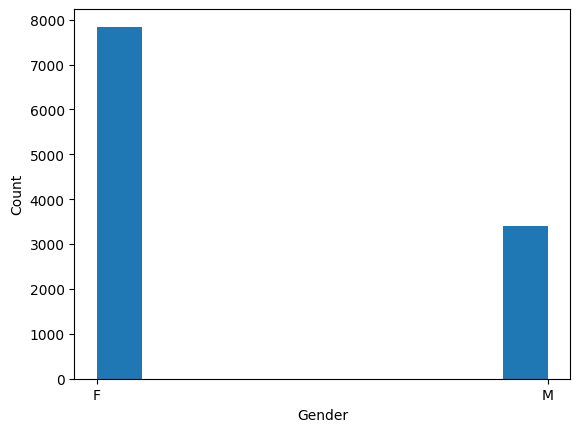

In [11]:

# plotting a bar chart for Gender and it's count

x=df["Gender"]
plt.hist(x)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

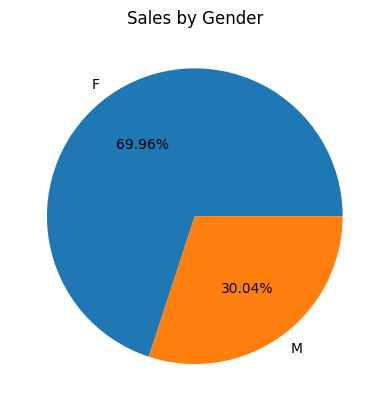

In [98]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
x=sales_gen['Gender']
y=sales_gen['Amount']
plt.title("Sales by Gender")

plt.pie(y,labels=x,autopct="%0.2f%%")
plt.show()


###  From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# Age

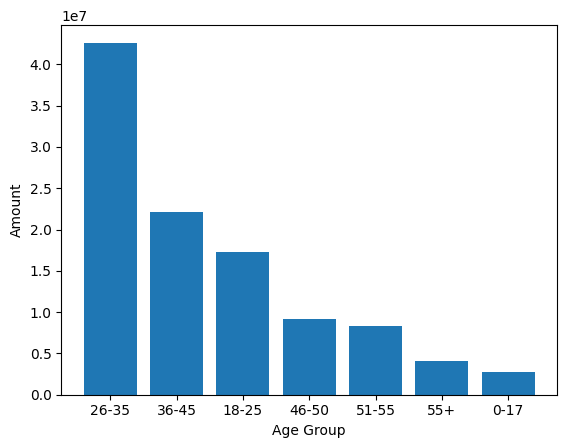

In [67]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sale = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
x=sales_age["Age Group"]
z=sale["Gender"]
y=sales_age["Amount"]
plt.xlabel("Age Group")
plt.ylabel("Amount")
plt.bar(x,y)
plt.show()

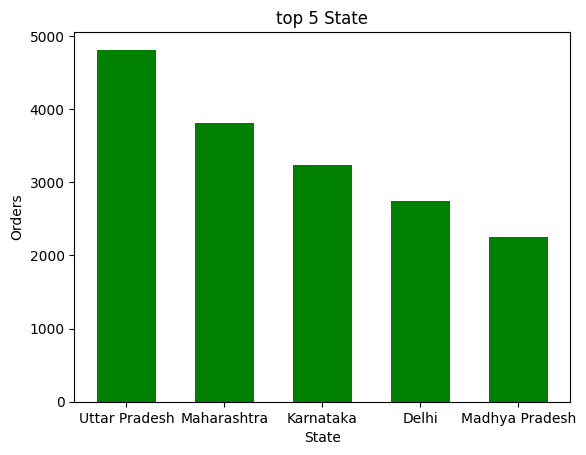

In [38]:
top=df.groupby(['State'],as_index=False) ['Orders'].sum().sort_values(by="Orders", ascending=False).head(5)
x=top["State"]
y=top["Orders"]
plt.xlabel("State")
plt.ylabel("Orders")
plt.title("top 5 State")
plt.bar(x,y,color="green",width=0.6)
plt.show()



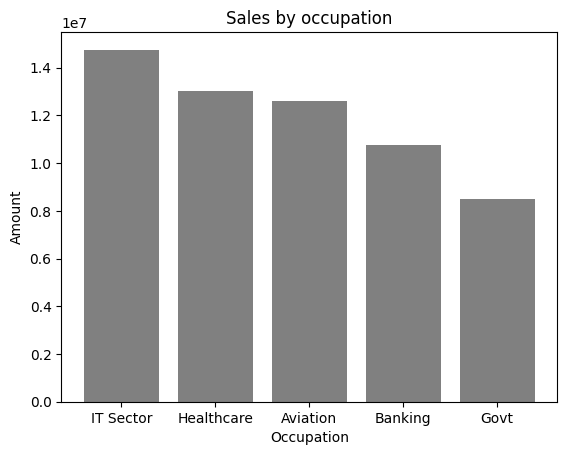

In [94]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)


x=sales_state["Occupation"]
y=sales_state["Amount"]
plt.bar(x,y,color="grey")
plt.xlabel("Occupation")
plt.ylabel("Amount")
plt.title("Sales by occupation")
plt.show()

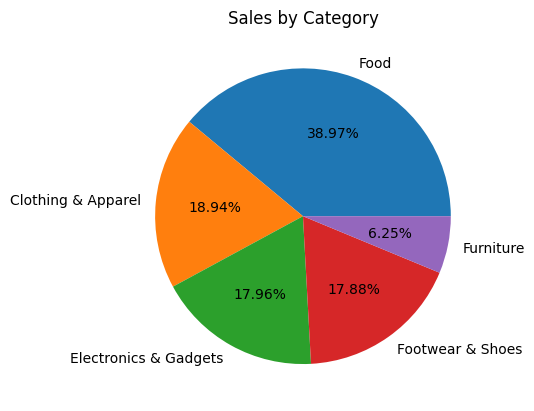

In [91]:
product= df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
x=product["Product_Category"]
y=product["Amount"]
plt.title("Sales by Category")

plt.pie(y,labels=x,autopct="%0.2f%%")
plt.show()

# Conclusion:
## women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category





